In [196]:

!pip install graphviz # Needed to paint the decision tree

!pip install watson_machine_learning_client # Needed to work with the Watson Machine Learning Python client



In [197]:
# Import libraries

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import json
from sklearn import tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from watson_machine_learning_client import WatsonMachineLearningAPIClient
import graphviz 
from IPython.display import display


In [198]:
# The code was removed by Watson Studio for sharing.

,Humidity,Temperature,CO,Status
0,17,-3,2,1
1,17,-5,5,1
2,17,-4,2,1
3,17,2,0,1
4,17,0,15,1


In [199]:
# TRAIN AND EVALUATE THE MODEL
#split dataset in features and target variable
feature_cols = ['Humidity', 'Temperature', 'CO']
X = df_data_2[feature_cols] # Features
y = df_data_2.Status # Target variable

# Split the training data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 0)

In [200]:
X_train.head()

,Humidity,Temperature,CO
301,21,18,42
181,38,14,20
200,38,35,1
49,17,48,4
217,38,39,22


In [201]:


X_test.head()



,Humidity,Temperature,CO
54,17,53,9
124,38,18,25
264,21,10,19
175,38,8,5
283,21,37,22


In [202]:
y_train.head()

301    3
181    1
200    1
49     3
217    2
Name: Status, dtype: int64

In [203]:


# Train the model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#tree.plot_tree(clf)

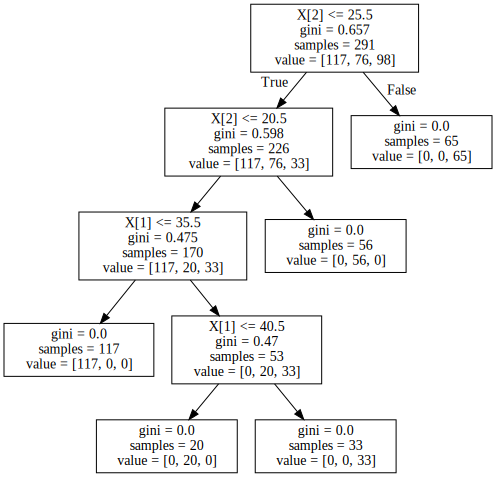

In [204]:
# Display the decision tree

display(graphviz.Source(tree.export_graphviz(clf)))

In [205]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [206]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


The model gives an accuracy of 100%, so it has no sense for this dataset to look for another machine learning algorithm

Now we can deploy the model in Watson

In [207]:
# DEPLOY THE MODEL

Create your wml_credentials variable with the next structure to access the WML service

`wml_credentials={
  "url": "xxxxxxxx",
  "apikey": "xxxxxxxx",
  "instance_id": "xxxxxxxx"
 }
`

In [208]:
# The code was removed by Watson Studio for sharing.

In [209]:
# Initialize the WML API Client
client = WatsonMachineLearningAPIClient(wml_credentials)

In [210]:
#Specify the Properties 
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Prometeo Team", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "", 
               client.repository.ModelMetaNames.NAME: "PrometeoManualModel"}


In [211]:
# Store the Machine Learning Model
model_artifact=client.repository.store_model(clf, meta_props=model_props)

In [212]:
# List of saved models
client.repository.list()

------------------------------------  -------------------  ------------------------  -----------------  -----
GUID                                  NAME                 CREATED                   FRAMEWORK          TYPE
5adc2261-b696-4d83-9f66-7671dab1dbb8  PrometeoManualModel  2020-01-06T22:45:27.116Z  scikit-learn-0.20  model
66fba9df-e9b5-416a-8be3-da18f5208640  PrometeoManualModel  2020-01-06T22:19:29.225Z  scikit-learn-0.20  model
b4cc8727-da1d-4ac5-ba4b-a907df7f1219  PrometeoManualModel  2020-01-06T21:58:42.526Z  scikit-learn-0.20  model
73a3cf06-20b8-4d4b-b51d-46f7958e29e1  PrometeoManualModel  2020-01-06T21:55:08.107Z  scikit-learn-0.20  model
b713fe6c-3808-49b5-994b-a75c7bfaa10f  PrometeoManualModel  2020-01-06T21:37:32.435Z  scikit-learn-0.20  model
b08031b9-4424-480b-be5e-51c7c28cbec4  PrometeoManualModel  2020-01-06T21:35:01.796Z  scikit-learn-0.20  model
a41c929a-1189-478e-b0cc-644e6cd23c40  PrometeoManualModel  2020-01-06T21:33:54.128Z  scikit-learn-0.20  model
f6dc01bc-1a

In [213]:
#Get model UID
published_model_uid = client.repository.get_model_uid(model_artifact)

#Deploy the model
created_deployment = client.deployments.create(published_model_uid, name="PrometeoManualModel")



#######################################################################################

Synchronous deployment creation for uid: '5adc2261-b696-4d83-9f66-7671dab1dbb8' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='416f1531-fee0-44da-ac8f-99890a479cb0'
------------------------------------------------------------------------------------------------




In [214]:
# Scoring endpoint of our deployed Machine learning model
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ab316f3d-92d8-4e31-8940-b0e7a26412d6/deployments/416f1531-fee0-44da-ac8f-99890a479cb0/online


In [215]:
# Sample code to test the scoring endpoint and get predictions
payload_scoring = {"fields": ["Humidity", "Temperature", "CCO"], "values": [[20, 30, 50]]}
predictions = client.deployments.score(scoring_endpoint, payload_scoring)
print(predictions)

{'fields': ['prediction', 'probability'], 'values': [[3, [0.0, 0.0, 1.0]]]}
